# **CAPSTONE PROJECT - Classification Pose for Stroke Rehabilitation**

---

**Team ID** : C22-PS185

**Nama Anggota** : 
1. M2006F0601 - Chindy Aulia Sari - Universitas Brawijaya
2. M2006F0600 - Firda Adha Cahyanti - Universitas Brawijaya

**Tema** : Human Healthcare & Animal Welfare

## **1. Pendahuluan**

Stroke merupakan salah satu penyakit . Menurut Data . Proyek ini diharapkan dapat digunakan oleh ... untuk...

## **2. Business Understanding**

### **2.1. Problem Statements**
Proyek ini akan ... sehingga permasalahan yang perlu untuk diselesaikan yaitu sebagai berikut:
- apa
- apa

### **2.2. Goals**
Sesuai dengan permasalahan yang telah disebutkan, maka goals dalam proyek ini yaitu .

### **2.3. Solution Statements**
Agar bisa menjawab masalah di atas dan mencapai goals yang sudah ditentukan, maka solusi yang dilakukan yaitu membuat model development dengan algoritma convolutional neural network (CNN). Berikut penjelasannya.
- Convolutional Neural Network merupakan salah satu jenis algoritme Deep Learning yang dapat menerima input berupa gambar, menentukan aspek atau obyek apa saja dalam sebuah gambar yang bisa digunakan mesin untuk “belajar” mengenali gambar, dan membedakan antara satu gambar dengan yang lainnya.
Arsitektur CNN terbilang mirip dengan pola koneksi neuron atau sel saraf dalam otak manusia. CNN terinspirasi dari Visual Cortex, yaitu bagian pada otak yang bertugas untuk memroses informasi dalam bentuk visual.

## **3. Data Understanding**

Proyek ini menggunakan dataset . Dataset ini berisi  gambar , dimana gambar dikategorikan sebagai . Dataset ini dapat diunduh di sini

## **4. Data Loading**
Tahap ini merupakan tahapan mengakses data, seperti menyiapkan library dan akses terhadap datasetnya.

**4.1. Mengimpor Library yang akan digunakan**

In [1]:
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

**4.2. Mengunduh Dataset**

In [3]:
!wget --no-check-certificate \
    "https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t" \
    -O "/tmp/data.zip"

local_zip = '/tmp/data.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-06-08 05:10:33--  https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.100, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t [following]
--2022-06-08 05:10:33--  https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5h6mmkh9c85l9uknjvr4hs6defieacn9/1654665000000/10501907559150766263/*/16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58?e=download [following]
--2022-06-08 05:10:34--  https://doc-0s-6c-docs.googleusercontent.com/docs/secur

**4.3. Mengakses Direktori Dataset yang akan digunakan**

In [4]:
# Define root directory
root_dir = '/tmp/faces'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):

  os.makedirs(root_path + '/training')
  os.makedirs(root_path + '/validation')
  os.makedirs(root_path + '/training/open-mouth')
  os.makedirs(root_path + '/training/puff-cheeck')
  os.makedirs(root_path + '/training/show-teeth')
  os.makedirs(root_path + '/training/smile')
  os.makedirs(root_path + '/training/sneer')
  
  os.makedirs(root_path + '/validation/open-mouth')
  os.makedirs(root_path + '/validation/puff-cheeck')
  os.makedirs(root_path + '/validation/show-teeth')
  os.makedirs(root_path + '/validation/smile')
  os.makedirs(root_path + '/validation/sneer')

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Test for create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/faces/validation
/tmp/faces/training
/tmp/faces/validation/open-mouth
/tmp/faces/validation/sneer
/tmp/faces/validation/puff-cheeck
/tmp/faces/validation/show-teeth
/tmp/faces/validation/smile
/tmp/faces/training/open-mouth
/tmp/faces/training/sneer
/tmp/faces/training/puff-cheeck
/tmp/faces/training/show-teeth
/tmp/faces/training/smile


**4.4. Membagi Dataset menjadi data train dan validasi dengan komposisi 7:3**

In [6]:
# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  ### START CODE HERE
  files = []
  for path in os.listdir(SOURCE_DIR):
    if os.path.getsize(SOURCE_DIR + path) > 0:
      files.append(SOURCE_DIR + path)
    else:
      print(path+' is zero length, so ignoring.')


  random_trainfile = random.sample(files, int(SPLIT_SIZE*len(files)))

  for path in random_trainfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], TRAINING_DIR + path[path.rfind('/')+1 : ])

  random_testingfiles = list(set(files)-set(random_trainfile))
  random_testingfile = random.sample(random_testingfiles, len(random_testingfiles))
  
  for path in random_testingfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], VALIDATION_DIR + path[path.rfind('/')+1 : ])


In [7]:
# Test for split_data function

# Define paths
om_dir = "/tmp/face/open-mouth/"
smile_dir = "/tmp/face/smile/"
puff_dir = "/tmp/face/puff-cheeks/"
show_dir = "/tmp/face/show-teeth/"
sneer_dir = "/tmp/face/sneer-on-one-side/"

TRAINING_DIR = "/tmp/faces/training/"
VALIDATION_DIR = "/tmp/faces/validation/"

TRAINING_SMILE_DIR = os.path.join(TRAINING_DIR, "smile/")
VALIDATION_SMILE_DIR = os.path.join(VALIDATION_DIR, "smile/")

TRAINING_sneer_DIR = os.path.join(TRAINING_DIR, "sneer/")
VALIDATION_sneer_DIR = os.path.join(VALIDATION_DIR, "sneer/")

TRAINING_show_DIR = os.path.join(TRAINING_DIR, "show-teeth/")
VALIDATION_show_DIR = os.path.join(VALIDATION_DIR, "show-teeth/")

TRAINING_puff_DIR = os.path.join(TRAINING_DIR, "puff-cheeck/")
VALIDATION_puff_DIR = os.path.join(VALIDATION_DIR, "puff-cheeck/")

TRAINING_open_DIR = os.path.join(TRAINING_DIR, "open-mouth/")
VALIDATION_open_DIR = os.path.join(VALIDATION_DIR, "open-mouth/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_SMILE_DIR)) > 0:
  for file in os.scandir(TRAINING_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_sneer_DIR)) > 0:
  for file in os.scandir(TRAINING_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_show_DIR)) > 0:
  for file in os.scandir(TRAINING_show_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_puff_DIR)) > 0:
  for file in os.scandir(TRAINING_puff_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_open_DIR)) > 0:
  for file in os.scandir(TRAINING_open_DIR):
    os.remove(file.path)


if len(os.listdir(VALIDATION_SMILE_DIR)) > 0:
  for file in os.scandir(VALIDATION_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sneer_DIR)) > 0:
  for file in os.scandir(VALIDATION_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_show_DIR)) > 0:
  for file in os.scandir(VALIDATION_show_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_puff_DIR)) > 0:
  for file in os.scandir(VALIDATION_puff_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_open_DIR)) > 0:
  for file in os.scandir(VALIDATION_open_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the split_data function
split_data(om_dir, TRAINING_open_DIR, VALIDATION_open_DIR, split_size)
split_data(smile_dir, TRAINING_SMILE_DIR, VALIDATION_SMILE_DIR, split_size)
split_data(puff_dir, TRAINING_puff_DIR, VALIDATION_puff_DIR, split_size)
split_data(show_dir, TRAINING_show_DIR, VALIDATION_show_DIR, split_size)
split_data(sneer_dir, TRAINING_sneer_DIR, VALIDATION_sneer_DIR, split_size)

## **5. Data Pre-processing dan Data Augmentation**
Tahap ini merupakan tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

In [8]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1/255
                                    ,rotation_range=40,
                                     width_shift_range=0.25,
                                     height_shift_range=0.25,
                                     shear_range=0.25,
                                     zoom_range=0.25,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=25,
                                                      class_mode='categorical',
                                                      shuffle=True,
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,
                                                                shuffle=True,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 720 images belonging to 5 classes.
Found 180 images belonging to 5 classes.


## **6. Modeling**

Pada tahap ini, kita akan mengembangkan model machine learning dengan algoritma convolutional neural network (CNN) dari MobileNetV2

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
# Set the weights file you downloaded into a variable
# local_weights_file = '/tmp/mobilenet_1_0_224_tf.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet' )

# Load the pre-trained weights you downloaded.
# pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

In [12]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('conv_7b_ac')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 1536)


In [13]:
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

**Menggunakan Callback**

In [14]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.87) and (logs.get('accuracy')>0.9):
      print("\nReached 0.87 % val accuracy so cancelling training!")
      self.model.stop_training = True

In [15]:
callback = myCallback()
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Set the training parameters
model.compile(optimizer = Adam(learning_rate=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## **7. Training Model**

In [16]:
# callbacks = myCallback()
history = model.fit(
            train_generator,
                    steps_per_epoch = 5,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callback]
                    #callbacks=[callback]
                    )


Epoch 1/50
5/5 [==============================] - 26s 2s/step - loss: 37.7119 - accuracy: 0.2000 - val_loss: 19.4944 - val_accuracy: 0.2167
Epoch 2/50
5/5 [==============================] - 3s 692ms/step - loss: 16.4499 - accuracy: 0.2800 - val_loss: 6.2233 - val_accuracy: 0.4056
Epoch 3/50
5/5 [==============================] - 3s 666ms/step - loss: 9.4395 - accuracy: 0.2480 - val_loss: 5.2389 - val_accuracy: 0.4056
Epoch 4/50
5/5 [==============================] - 3s 675ms/step - loss: 6.7031 - accuracy: 0.2800 - val_loss: 3.9694 - val_accuracy: 0.4667
Epoch 5/50
5/5 [==============================] - 3s 684ms/step - loss: 4.6909 - accuracy: 0.4720 - val_loss: 2.6188 - val_accuracy: 0.5389
Epoch 6/50
5/5 [==============================] - 4s 826ms/step - loss: 3.5288 - accuracy: 0.4083 - val_loss: 2.8992 - val_accuracy: 0.5222
Epoch 7/50
5/5 [==============================] - 3s 664ms/step - loss: 3.1873 - accuracy: 0.4167 - val_loss: 2.0270 - val_accuracy: 0.4556
Epoch 8/50
5/5 [===

In [17]:
model.evaluate(validation_generator)
model.evaluate(train_generator)

29/29 [==============================] - 11s 366ms/step - loss: 1.0101 - accuracy: 0.6125


[1.0100769996643066, 0.612500011920929]

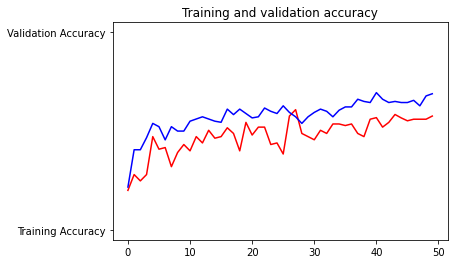

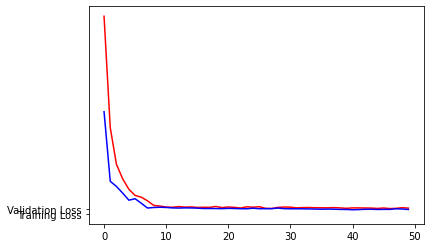

In [18]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

8/8 - 4s - 4s/epoch - 491ms/step
[1 3 3 0 3 2 2 4 2 2 0 0 0 2 1 4 4 2 3 3 4 3 0 2 1 1 3 2 2 3 3 4 4 1 1 2 3
 2 2 0 4 4 1 4 0 2 4 4 0 4 2 1 0 4 0 1 4 2 2 2 0 2 3 4 2 4 2 3 1 1 4 1 4 4
 4 4 1 1 4 3 4 1 3 4 2 0 2 0 1 3 2 3 0 3 3 3 4 4 4 2 3 0 2 4 0 4 2 0 3 1 4
 4 4 2 0 1 4 3 0 0 0 2 1 1 4 4 2 1 2 3 2 0 4 4 1 4 0 3 1 4 2 2 3 4 3 1 0 1
 3 4 3 2 2 2 4 1 1 2 3 2 1 3 4 4 0 4 1 1 4 4 2 0 1 0 1 1 3 0 2 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
0.16666666666666666
              precision    recall  f1-score   support

           0       0.18      0.14      0.16        36
           1       0.18      0.17      0.17        36
           2       0.15      0.17      0.16        3

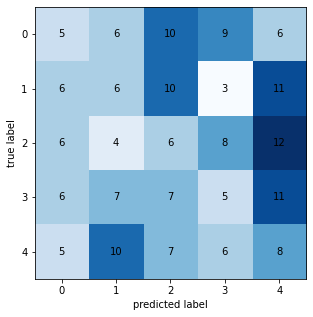

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

prediction= model.predict(validation_generator, steps=np.ceil(validation_generator.samples/validation_generator.batch_size), verbose=2)
pred = np.argmax(prediction, axis=1)
print(pred)

print(validation_generator.classes)
cm= confusion_matrix(validation_generator.classes, pred)
plot_confusion_matrix(cm, figsize=(5,5))
print(accuracy_score(validation_generator.classes, pred))
print(classification_report(validation_generator.classes, pred))

In [20]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image


Saving WhatsApp Image 2022-06-08 at 12.22.39 (2).jpeg to WhatsApp Image 2022-06-08 at 12.22.39 (2).jpeg
Saving WhatsApp Image 2022-06-08 at 12.22.39 (1).jpeg to WhatsApp Image 2022-06-08 at 12.22.39 (1).jpeg
Saving WhatsApp Image 2022-06-08 at 12.22.39.jpeg to WhatsApp Image 2022-06-08 at 12.22.39.jpeg
Saving WhatsApp Image 2022-06-08 at 12.22.38 (2).jpeg to WhatsApp Image 2022-06-08 at 12.22.38 (2).jpeg
Saving WhatsApp Image 2022-06-08 at 12.22.38 (1).jpeg to WhatsApp Image 2022-06-08 at 12.22.38 (1).jpeg
Saving WhatsApp Image 2022-06-08 at 12.22.38.jpeg to WhatsApp Image 2022-06-08 at 12.22.38.jpeg


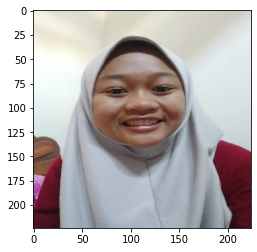

open-mouth: 18.94%
puff-cheeck: 20.13%
show-teeth: 13.80%
smile: 17.43%
sneer: 29.70%


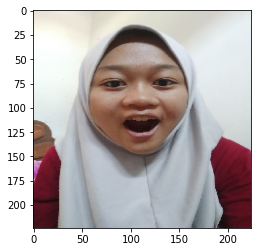

open-mouth: 22.83%
puff-cheeck: 19.78%
show-teeth: 17.94%
smile: 17.36%
sneer: 22.09%


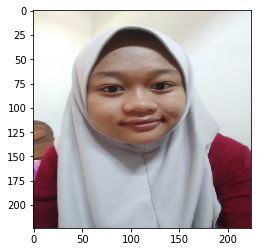

open-mouth: 12.51%
puff-cheeck: 22.53%
show-teeth: 14.87%
smile: 26.15%
sneer: 23.94%


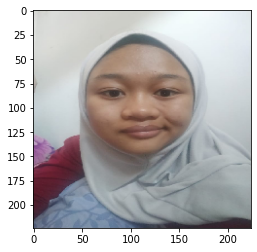

open-mouth: 9.21%
puff-cheeck: 22.16%
show-teeth: 11.66%
smile: 29.95%
sneer: 27.01%


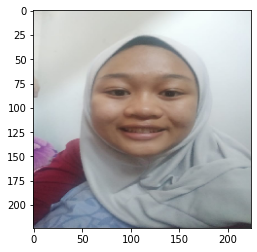

open-mouth: 16.33%
puff-cheeck: 20.54%
show-teeth: 17.90%
smile: 23.00%
sneer: 22.22%


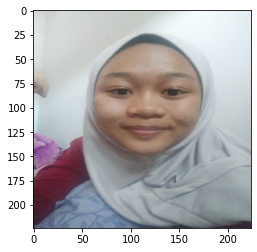

open-mouth: 7.94%
puff-cheeck: 23.72%
show-teeth: 10.84%
smile: 30.94%
sneer: 26.56%


In [22]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()
from tensorflow.keras.applications.xception import preprocess_input
for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))